# GSEA analysis on leukemia dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from gsea import *
import numpy as np
%pylab

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
%matplotlib inline

## Load data

In [4]:
genes, D, C = read_expression_file("data/leukemia.txt")
gene_sets, gene_set_names = read_genesets_file("data/pathways.txt", genes)
gene_set_hash = {}
for i in range(len(gene_sets)):
    gene_set_hash[gene_set_names[i][0]] = {'indexes':gene_sets[i],'desc':gene_set_names[i][1]}

In [5]:
# verify that the dimensions make sense
len(genes),D.shape,len(C)

(2672, (2672, 72), 72)

## Enrichment score calculations
We graphically present the calculation of ES.

In [173]:
L,r = rank_genes(D,C)

See if the first genes in *L* are indeed correlated with *C*

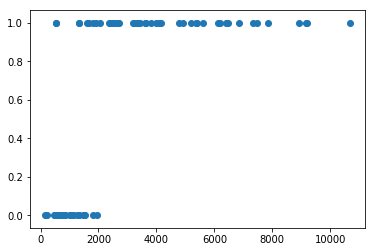

In [174]:
scatter(D[L[1],:],C)

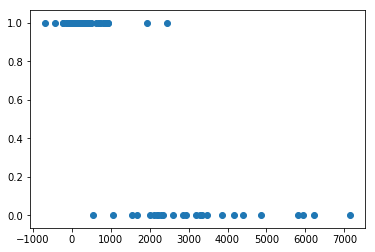

In [175]:
scatter(D[L[-1],:],C)

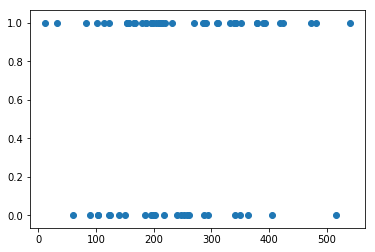

In [176]:
scatter(D[L[1000],:],C)

## Graphical ilustration of ES calculations

In [16]:
p_exp = 1
def plot_es_calculations(name, L, r):
    S = gene_set_hash[name]['indexes']
    N = len(L)
    S_mask = np.zeros(N)
    S_mask[S] = 1
    # reorder gene set mask
    S_mask = S_mask[L]
    N_R = sum(abs(r*S_mask)**p_exp)
    P_hit = np.cumsum(abs(r*S_mask)**p_exp)/N_R if N_R!=0 else np.zeros_like(S_mask)
    N_H = len(S)
    P_mis = np.cumsum((1-S_mask))/(N-N_H) if N!=N_H else np.zeros_like(S_mask)
    idx = np.argmax(abs(P_hit - P_mis))
    print("ES =", P_hit[idx]-P_mis[idx])
    f, axarr = plt.subplots(3, sharex=True)
    axarr[0].plot(S_mask)
    axarr[0].set_title('gene set %s' % name)
    axarr[1].plot(r)
    axarr[1].set_title('correlation with phenotype')
    axarr[2].plot(P_hit-P_mis)
    axarr[2].set_title('random walk')

ES = 0.214604376897


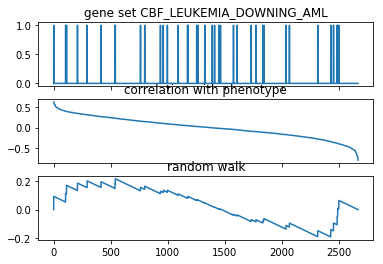

In [114]:
L,r = rank_genes(D,C)
plot_es_calculations('CBF_LEUKEMIA_DOWNING_AML', L, r)

## Random phenotype labels
Now let's assign phenotype labels randomly. Is the ES much different?

[0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0
 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0]
ES = -0.446675459428


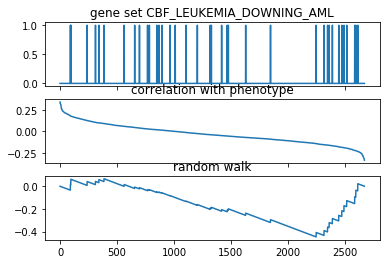

In [19]:
N, k = D.shape
pi = np.array([np.random.randint(0,2) for i in range(k)])
L, r = rank_genes(D,pi)
print(pi)
plot_es_calculations('CBF_LEUKEMIA_DOWNING_AML', L, r)

## GSEA analysis

In [27]:
%time order, NES, p_values = gsea(D, C, gene_sets)

/usr/lib64/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


CPU times: user 8min 38s, sys: 100 ms, total: 8min 38s
Wall time: 8min 39s


In [35]:
from IPython.display import display, Markdown
s = "| geneset | NES | p-value | number of genes in geneset |\n |-------|---|---|---|\n "
for i in range(len(order)):
    s = s + "| **%s** | %.3f | %.7f | %d |\n" % (gene_set_names[order[i]][0], NES[i], p_values[i], len(gene_sets[order[i]]))
display(Markdown(s))

| geneset | NES | p-value | number of genes in geneset |
 |-------|---|---|---|
 | **DNA_DAMAGE_SIGNALLING** | 1.833 | 0.0000000 | 60 |
| **MAP00480_Glutathione_metabolism** | -1.780 | 0.0060976 | 13 |
| **MAP00193_ATP_synthesis** | -1.756 | 0.0040323 | 10 |
| **MAP00195_Photosynthesis** | -1.756 | 0.0040323 | 10 |
| **MAP03070_Type_III_secretion_system** | -1.756 | 0.0040323 | 10 |
| **CR_CELL_CYCLE** | 1.749 | 0.0118812 | 56 |
| **cell_cycle_checkpointII** | 1.740 | 0.0020964 | 7 |
| **Cell_Cycle** | 1.717 | 0.0397614 | 50 |
| **g2Pathway** | 1.710 | 0.0099602 | 19 |
| **ST_Ga13_Pathway** | -1.698 | 0.0193050 | 22 |
| **compPathway** | -1.696 | 0.0157171 | 13 |
| **stemPathway** | -1.690 | 0.0093633 | 10 |
| **il10Pathway** | -1.688 | 0.0181452 | 13 |
| **ST_Gaq_Pathway** | -1.675 | 0.0305927 | 18 |
| **MAP00600_Sphingoglycolipid_metabolism** | -1.671 | 0.0181818 | 9 |
| **ANTI_CD44_UP** | -1.670 | 0.0125523 | 23 |
| **MAP00530_Aminosugars_metabolism** | -1.662 | 0.0161943 | 10 |
| **neutrophilPathway** | -1.660 | 0.0138889 | 8 |
| **mRNA_splicing** | 1.660 | 0.0239521 | 28 |
| **rbPathway** | 1.658 | 0.0177165 | 11 |
| **cell2cellPathway** | -1.654 | 0.0116505 | 8 |
| **HOXA9_DOWN** | -1.654 | 0.0197628 | 26 |
| **MAP00531_Glycosaminoglycan_degradation** | -1.647 | 0.0081301 | 9 |
| **eif2Pathway** | 1.644 | 0.0119048 | 6 |
| **alternativePathway** | -1.635 | 0.0262172 | 8 |
| **tsp1Pathway** | -1.632 | 0.0163265 | 7 |
| **cell_adhesion** | -1.630 | 0.0040404 | 103 |
| **Matrix_Metalloproteinases** | -1.612 | 0.0181818 | 16 |
| **SA_MMP_CYTOKINE_CONNECTION** | -1.611 | 0.0258964 | 11 |
| **MAP_kinase_kinase_activity** | -1.608 | 0.0100200 | 4 |
| **integrinPathway** | -1.608 | 0.0331384 | 24 |
| **MAP00680_Methane_metabolism** | -1.605 | 0.0286299 | 6 |
| **CR_REPAIR** | 1.601 | 0.0382294 | 25 |
| **MAP00910_Nitrogen_metabolism** | -1.599 | 0.0243902 | 11 |
| **GO_ROS** | -1.597 | 0.0413223 | 19 |
| **p53Pathway** | 1.595 | 0.0369610 | 13 |
| **MAP00603_Globoside_metabolism** | -1.589 | 0.0281690 | 9 |
| **Proteasome_Degradation** | 1.584 | 0.0516899 | 28 |
| **ROS** | -1.584 | 0.0266393 | 6 |
| **KRAS_TOP100_KNOCKDOWN** | -1.580 | 0.0263158 | 34 |
| **cell_adhesion_molecule_activity** | -1.576 | 0.0185185 | 64 |
| **arfPathway** | 1.560 | 0.0354906 | 12 |
| **tertPathway** | 1.556 | 0.0340000 | 8 |
| **il1rPathway** | -1.552 | 0.0726916 | 20 |
| **DOWNREG_BY_HOXA9** | -1.536 | 0.0346939 | 23 |
| **fbw7Pathway** | 1.535 | 0.0459082 | 8 |
| **reckPathway** | -1.533 | 0.0591837 | 6 |
| **tollPathway** | -1.532 | 0.0459082 | 15 |
| **cell_motility** | -1.531 | 0.0364683 | 63 |
| **NFKB_REDUCED** | -1.527 | 0.0579151 | 12 |
| **il6Pathway** | -1.522 | 0.0483559 | 16 |
| **HTERT_DOWN** | -1.515 | 0.0337302 | 59 |
| **pgc1aPathway** | 1.512 | 0.0693277 | 13 |
| **extrinsicPathway** | -1.512 | 0.0582329 | 11 |
| **radiation_sensitivity** | 1.509 | 0.0542299 | 18 |
| **41bbPathway** | -1.505 | 0.0596421 | 12 |
| **monocytePathway** | -1.505 | 0.0811881 | 11 |
| **ranklPathway** | -1.496 | 0.0540541 | 10 |
| **telPathway** | 1.491 | 0.0688935 | 12 |
| **pepiPathway** | -1.491 | 0.0436508 | 5 |
| **Pentose_Phosphate_Pathway** | -1.490 | 0.0401691 | 5 |
| **eosinophilsPathway** | -1.489 | 0.0530452 | 6 |
| **stressPathway** | -1.488 | 0.0504032 | 16 |
| **MAP00230_Purine_metabolism** | 1.487 | 0.0452756 | 55 |
| **cell_adhesion_receptor_activity** | -1.484 | 0.0592885 | 21 |
| **S1P_Signaling** | -1.481 | 0.0450098 | 12 |
| **mspPathway** | -1.481 | 0.0458333 | 4 |
| **p27Pathway** | 1.480 | 0.0594480 | 10 |
| **il5Pathway** | -1.480 | 0.0796117 | 9 |
| **ldlPathway** | -1.479 | 0.0636183 | 6 |
| **cdc25Pathway** | 1.475 | 0.0450980 | 7 |
| **th1th2Pathway** | -1.471 | 0.0730769 | 13 |
| **ADULT_LIVER_vs_FETAL_LIVER_GNF2** | -1.471 | 0.0623742 | 34 |
| **MAP00380_Tryptophan_metabolism** | -1.470 | 0.0655391 | 30 |
| **cell_cycle_checkpoint** | 1.465 | 0.1104294 | 17 |
| **tnfr2Pathway** | -1.463 | 0.0982318 | 10 |
| **mRNA_processing** | 1.461 | 0.0924370 | 27 |
| **atrbrcaPathway** | 1.459 | 0.0861723 | 8 |
| **il18Pathway** | -1.456 | 0.0797546 | 6 |
| **lymphocytePathway** | -1.454 | 0.0962672 | 9 |
| **pentosePathway** | -1.453 | 0.0494071 | 3 |
| **GLYCOL** | -1.453 | 0.0905350 | 12 |
| **CR_CAM** | -1.452 | 0.0449219 | 71 |
| **plk3Pathway** | 1.449 | 0.0688935 | 5 |
| **MAP00970_Aminoacyl_tRNA_biosynthesis** | 1.448 | 0.0910781 | 16 |
| **classicPathway** | -1.444 | 0.0929752 | 9 |
| **MAP00340_Histidine_metabolism** | -1.439 | 0.0682303 | 12 |
| **Eicosanoid_Synthesis** | -1.435 | 0.0774194 | 11 |
| **lairPathway** | -1.435 | 0.1003937 | 15 |
| **ST_G_alpha_i_Pathway_** | -1.433 | 0.0864440 | 20 |
| **AR_ORTHOS_MAPPED_TO_U133_VIA_NETAFFX** | 1.431 | 0.0722892 | 26 |
| **AR_MOUSE** | 1.431 | 0.0722892 | 26 |
| **EMT_DOWN** | -1.423 | 0.0745098 | 29 |
| **ifngPathway** | -1.420 | 0.0857700 | 5 |
| **setPathway** | 1.414 | 0.0907258 | 10 |
| **MAP00860_Porphyrin_and_chlorophyll_metabolism** | -1.409 | 0.1189979 | 12 |
| **freePathway** | -1.405 | 0.1217039 | 7 |
| **MAP00590_Prostaglandin_and_leukotriene_metabolism** | -1.401 | 0.0944206 | 10 |
| **HOX_LIST_JP** | -1.394 | 0.1295938 | 18 |
| **mitochondriaPathway** | 1.393 | 0.1077236 | 13 |
| **cytokinePathway** | -1.390 | 0.1000000 | 14 |
| **krebPathway** | 1.389 | 0.0958904 | 6 |
| **inflamPathway** | -1.388 | 0.0888031 | 22 |
| **dcPathway** | -1.386 | 0.1360947 | 13 |
| **MAP00620_Pyruvate_metabolism** | 1.382 | 0.1283644 | 23 |
| **ANDROGEN_UP_GENES** | -1.378 | 0.0766284 | 37 |
| **CR_TRANSPORT_OF_VESICLES** | -1.376 | 0.1397206 | 17 |
| **mcalpainPathway** | -1.371 | 0.1138716 | 19 |
| **etcPathway** | 1.370 | 0.1019608 | 6 |
| **tcraPathway** | 1.365 | 0.1673469 | 12 |
| **GLUT_DOWN** | 1.357 | 0.1762376 | 184 |
| **bcl2family_and_reg_network** | -1.355 | 0.1259690 | 15 |
| **blymphocytePathway** | -1.354 | 0.1529412 | 9 |
| **tercPathway** | 1.351 | 0.1391650 | 6 |
| **keratinocytePathway** | -1.350 | 0.1385542 | 30 |
| **Glycogen_Metabolism** | 1.348 | 0.1162325 | 25 |
| **fosbPathway** | -1.347 | 0.1153082 | 4 |
| **tRNA_Synthetases** | 1.347 | 0.1535509 | 17 |
| **mitrPathway** | 1.346 | 0.1180258 | 3 |
| **tumor_supressor** | 1.346 | 0.1315789 | 18 |
| **il7Pathway** | 1.344 | 0.1594203 | 15 |
| **cell_death** | -1.341 | 0.1240310 | 12 |
| **MAP00240_Pyrimidine_metabolism** | 1.335 | 0.1690141 | 31 |
| **vitcbPathway** | -1.333 | 0.1273486 | 5 |
| **dnafragmentPathway** | 1.329 | 0.1587302 | 8 |
| **erythPathway** | -1.328 | 0.1568627 | 10 |
| **g1Pathway** | 1.327 | 0.1304348 | 23 |
| **MAP00500_Starch_and_sucrose_metabolism** | -1.326 | 0.1680162 | 15 |
| **SA_REG_CASCADE_OF_CYCLIN_EXPR** | 1.324 | 0.1411992 | 7 |
| **proteasomePathway** | 1.317 | 0.1952663 | 19 |
| **electron_transporter_activity** | -1.314 | 0.1081633 | 60 |
| **ST_Tumor_Necrosis_Factor_Pathway** | -1.314 | 0.1533981 | 22 |
| **MAP00030_Pentose_phosphate_pathway** | -1.309 | 0.1940000 | 13 |
| **hdacPathway** | 1.307 | 0.1768293 | 19 |
| **ST_Ga12_Pathway** | -1.305 | 0.1591356 | 15 |
| **gabaPathway** | -1.303 | 0.1764706 | 4 |
| **relaPathway** | -1.303 | 0.1630648 | 12 |
| **MAP00252_Alanine_and_aspartate_metabolism** | 1.302 | 0.1683992 | 17 |
| **Krebs-TCA_Cycle** | 1.302 | 0.1832994 | 21 |
| **il22bpPathway** | -1.301 | 0.1909263 | 7 |
| **ahspPathway** | -1.300 | 0.2459016 | 9 |
| **nktPathway** | -1.299 | 0.1560000 | 23 |
| **NFKB_INDUCED** | -1.299 | 0.1838384 | 81 |
| **eea1Pathway** | -1.298 | 0.1777778 | 4 |
| **Fatty_Acid_Synthesis** | 1.298 | 0.1618852 | 7 |
| **longevityPathway** | -1.297 | 0.2007648 | 10 |
| **intrinsicPathway** | -1.297 | 0.1781377 | 13 |
| **Wnt_Signaling** | 1.295 | 0.1393939 | 29 |
| **EMT_UP** | -1.293 | 0.1363636 | 46 |
| **ST_STAT3_Pathway** | -1.290 | 0.1775148 | 5 |
| **mta3Pathway** | -1.288 | 0.2027559 | 7 |
| **MAP00602_Blood_group_glycolipid_biosynthesis_neolact_series** | -1.287 | 0.1729622 | 7 |
| **tnf_and_fas_network** | -1.286 | 0.2059406 | 16 |
| **slrp2Pathway** | -1.284 | 0.1513944 | 3 |
| **ST_Dictyostelium_discoideum_cAMP_Receptor_G_Protein_Independent_Pathways** | 1.284 | 0.1733871 | 3 |
| **ST_MONOCYTE_AD_PATHWAY** | -1.283 | 0.1766990 | 17 |
| **Complement_Activation_Classical** | -1.281 | 0.1850312 | 10 |
| **MAP00360_Phenylalanine_metabolism** | -1.281 | 0.1818182 | 9 |
| **TCA** | 1.279 | 0.1988189 | 10 |
| **eponfkbPathway** | -1.275 | 0.2246964 | 8 |
| **egfr_smrtePathway** | -1.274 | 0.1878788 | 7 |
| **ANTI_CD44_DOWN** | -1.273 | 0.1771894 | 12 |
| **XINACT_MERGED** | 1.272 | 0.2204724 | 12 |
| **lechtinPathway** | -1.272 | 0.1745380 | 8 |
| **MAP00561_Glycerolipid_metabolism** | -1.265 | 0.1680328 | 27 |
| **GPCRs_Class_A_Rhodopsin-like** | -1.264 | 0.1988304 | 63 |
| **SIG_CD40PATHWAYMAP** | -1.264 | 0.1965649 | 19 |
| **CR_CYTOSKELETON** | -1.263 | 0.1941176 | 19 |
| **akap13Pathway** | -1.260 | 0.2016293 | 5 |
| **ST_ERK1_ERK2_MAPK_Pathway** | -1.259 | 0.1968811 | 23 |
| **MAP00310_Lysine_degradation** | -1.259 | 0.2085020 | 11 |
| **ST_IL_13_PATHWAY** | -1.258 | 0.1797980 | 4 |
| **ST_Interleukin_13_Pathway** | -1.258 | 0.1797980 | 4 |
| **il3Pathway** | -1.257 | 0.2152642 | 11 |
| **d4gdiPathway** | 1.256 | 0.1733871 | 11 |
| **ST_Type_I_Interferon_Pathway** | -1.256 | 0.1923077 | 8 |
| **CR_TRANSCRIPTION_FACTORS** | -1.249 | 0.2118321 | 49 |
| **fasPathway** | 1.248 | 0.2217484 | 21 |
| **drug_resistance_and_metabolism** | 1.244 | 0.1390041 | 71 |
| **cellcyclePathway** | 1.243 | 0.2107438 | 19 |
| **epoPathway** | -1.241 | 0.2246521 | 16 |
| **ifnaPathway** | -1.239 | 0.2220000 | 8 |
| **tidPathway** | -1.238 | 0.2558594 | 13 |
| **TESTIS_GENES_FROM_XHX_AND_NETAFFX** | -1.235 | 0.2115768 | 20 |
| **fibrinolysisPathway** | -1.232 | 0.2220149 | 9 |
| **anthraxPathway** | -1.232 | 0.1712474 | 2 |
| **LEU_DOWN** | 1.229 | 0.2555332 | 120 |
| **cd40Pathway** | -1.228 | 0.2648752 | 7 |
| **pyk2Pathway** | -1.227 | 0.2416503 | 23 |
| **FRASOR_ER_DOWN** | -1.224 | 0.1964286 | 41 |
| **SA_CASPASE_CASCADE** | 1.224 | 0.2475442 | 13 |
| **neurotransmittersPathway** | -1.223 | 0.2378049 | 6 |
| **fatty_acid_metabolism** | -1.222 | 0.2331288 | 10 |
| **TGF_Beta_Signaling_Pathway** | -1.222 | 0.2069632 | 26 |
| **rarPathway** | -1.221 | 0.2460938 | 3 |
| **gata3Pathway** | -1.210 | 0.2124248 | 12 |
| **mrpPathway** | -1.206 | 0.2397661 | 3 |
| **ST_Interferon_gamma_Pathway** | -1.205 | 0.2558594 | 5 |
| **insulin_signalling** | -1.205 | 0.2186312 | 69 |
| **RAP_UP** | 1.204 | 0.2301255 | 104 |
| **aifPathway** | 1.203 | 0.2328244 | 2 |
| **srcRPTPPathway** | 1.203 | 0.2714286 | 10 |
| **GATA1_WEISS** | -1.198 | 0.2751540 | 13 |
| **pkcPathway** | -1.197 | 0.2600382 | 6 |
| **MAP00630_Glyoxylate_and_dicarboxylate_metabolism** | 1.196 | 0.2632613 | 5 |
| **plcePathway** | -1.191 | 0.2455796 | 7 |
| **tcrMoleculePathway** | 1.190 | 0.3367347 | 5 |
| **carm-erPathway** | 1.186 | 0.3066132 | 15 |
| **tnfr1Pathway** | 1.185 | 0.2643443 | 23 |
| **tall1Pathway** | -1.184 | 0.2828685 | 8 |
| **INSULIN_2F_UP** | 1.183 | 0.2809224 | 111 |
| **amiPathway** | 1.178 | 0.2689938 | 21 |
| **cskPathway** | 1.178 | 0.2689938 | 21 |
| **skp2e2fPathway** | 1.176 | 0.2725451 | 10 |
| **ST_Integrin_Signaling_Pathway** | -1.175 | 0.2725490 | 42 |
| **biopeptidesPathway** | -1.169 | 0.2669246 | 32 |
| **UPREG_BY_HOXA9** | -1.167 | 0.2785571 | 24 |
| **ptc1Pathway** | 1.165 | 0.2917466 | 9 |
| **MAP00670_One_carbon_pool_by_folate** | 1.162 | 0.2715105 | 10 |
| **rabPathway** | -1.161 | 0.2978723 | 10 |
| **botulinPathway** | 1.156 | 0.3048017 | 4 |
| **ngfPathway** | -1.155 | 0.3168317 | 15 |
| **calcineurinPathway** | 1.153 | 0.2889344 | 16 |
| **MAP00650_Butanoate_metabolism** | -1.152 | 0.2769857 | 16 |
| **MAP00330_Arginine_and_proline_metabolism** | -1.151 | 0.2568093 | 24 |
| **MAP00010_Glycolysis_Gluconeogenesis** | -1.147 | 0.3002028 | 36 |
| **mapkPathway** | -1.147 | 0.2617188 | 53 |
| **MAP00533_Keratan_sulfate_biosynthesis** | 1.145 | 0.2989691 | 2 |
| **acetaminophenPathway** | -1.142 | 0.3253968 | 5 |
| **SA_TRKA_RECEPTOR** | -1.141 | 0.3214286 | 12 |
| **nfkbPathway** | -1.140 | 0.3192771 | 16 |
| **ST_B_Cell_Antigen_Receptor** | -1.137 | 0.3219048 | 28 |
| **SA_DAG1** | -1.132 | 0.3109756 | 8 |
| **p35alzheimersPathway** | -1.131 | 0.3064833 | 9 |
| **glycolysisPathway** | -1.129 | 0.3286290 | 6 |
| **nthiPathway** | -1.129 | 0.3630952 | 14 |
| **carm1Pathway** | -1.129 | 0.3155819 | 10 |
| **hcmvPathway** | -1.128 | 0.3412229 | 14 |
| **GLUCO** | -1.125 | 0.2983539 | 19 |
| **stat3Pathway** | -1.125 | 0.3675889 | 6 |
| **ST_Differentiation_Pathway_in_PC12_Cells** | -1.122 | 0.3165736 | 28 |
| **ephA4Pathway** | -1.118 | 0.3424658 | 9 |
| **CR_HORMONAL_FUNCTIONS** | -1.118 | 0.3217054 | 6 |
| **ST_ADRENERGIC** | -1.118 | 0.3268482 | 27 |
| **GLUT_UP** | 1.114 | 0.3155819 | 134 |
| **ace2Pathway** | -1.114 | 0.3529412 | 4 |
| **MAP00020_Citrate_cycle_TCA_cycle** | 1.112 | 0.4047151 | 15 |
| **SA_G2_AND_M_PHASES** | 1.111 | 0.3551587 | 6 |
| **MAPK_Cascade** | -1.111 | 0.3339695 | 13 |
| **FRASOR_ER_UP** | 1.111 | 0.2960000 | 17 |
| **cell_cycle_regulator** | 1.110 | 0.3547718 | 17 |
| **igf1mtorPathway** | 1.103 | 0.3562992 | 17 |
| **CR_SIGNALLING** | -1.101 | 0.3086172 | 131 |
| **chemicalPathway** | 1.099 | 0.3272358 | 16 |
| **betaoxidationPathway** | 1.098 | 0.3869048 | 5 |
| **AR_MOUSE_PLUS_TESTO_FROM_NETAFFX** | 1.096 | 0.3244898 | 33 |
| **GLUCOSE_DOWN** | 1.095 | 0.3831967 | 87 |
| **HTERT_UP** | 1.093 | 0.3625255 | 100 |
| **MAPKKK_cascade** | -1.091 | 0.3604888 | 7 |
| **tcapoptosisPathway** | 1.089 | 0.3842975 | 7 |
| **ucalpainPathway** | -1.088 | 0.3584158 | 11 |
| **deathPathway** | -1.088 | 0.3413174 | 22 |
| **MAP00720_Reductive_carboxylate_cycle_CO2_fixation** | 1.087 | 0.3885602 | 6 |
| **caspasePathway** | 1.085 | 0.3727455 | 19 |
| **MAP00450_Selenoamino_acid_metabolism** | -1.084 | 0.3800425 | 4 |
| **ST_G_alpha_5_Pathway** | -1.077 | 0.3710317 | 8 |
| **gsk3Pathway** | -1.076 | 0.3925049 | 16 |
| **ranPathway** | 1.076 | 0.3923541 | 2 |
| **cell_surface_receptor_linked_signal_transduction** | -1.070 | 0.3627451 | 79 |
| **ptdinsPathway** | -1.070 | 0.3964497 | 17 |
| **bcrPathway** | 1.069 | 0.3853955 | 29 |
| **mRNA_binding_activity** | 1.068 | 0.4376278 | 8 |
| **SIG_BCR_Signaling_Pathway** | 1.066 | 0.3946281 | 37 |
| **feederPathway** | -1.062 | 0.4392713 | 4 |
| **wntPathway** | 1.058 | 0.4000000 | 13 |
| **cdk5Pathway** | -1.058 | 0.4152893 | 9 |
| **GPCRs_Class_B_Secretin-like** | -1.058 | 0.3653061 | 11 |
| **VOXPHOS** | 1.057 | 0.4567404 | 38 |
| **HEMO_TF_LIST_JP** | -1.056 | 0.3858268 | 58 |
| **tpoPathway** | -1.055 | 0.4114286 | 21 |
| **soddPathway** | -1.044 | 0.4367589 | 8 |
| **CR_IMMUNE_FUNCTION** | 1.042 | 0.3929961 | 38 |
| **MAP00350_Tyrosine_metabolism** | -1.041 | 0.4078675 | 17 |
| **spryPathway** | -1.036 | 0.4399185 | 9 |
| **ST_Interleukin_4_Pathway** | -1.034 | 0.4296875 | 14 |
| **rhoPathway** | -1.032 | 0.4308943 | 18 |
| **P53_DOWN** | 1.030 | 0.4223602 | 15 |
| **ST_PAC1_RECEPTOR_PATHWAY** | -1.026 | 0.4459725 | 6 |
| **MAP00601_Blood_group_glycolipid_biosynthesis_lact_series** | -1.021 | 0.4109312 | 5 |
| **ndkDynaminPathway** | 1.018 | 0.4372549 | 12 |
| **GLUCOSE_UP** | -1.015 | 0.4427646 | 25 |
| **MAP03020_RNA_polymerase** | 1.015 | 0.4861660 | 10 |
| **Electron_Transport_Chain** | 1.014 | 0.5100402 | 38 |
| **vifPathway** | 1.012 | 0.4549098 | 3 |
| **fmlppathway** | -1.012 | 0.4394251 | 27 |
| **gsPathway** | 1.007 | 0.4702259 | 5 |
| **MAP00052_Galactose_metabolism** | -1.006 | 0.4301310 | 16 |
| **vobesityPathway** | 1.005 | 0.4549098 | 6 |
| **malatexPathway** | 1.002 | 0.4766537 | 6 |
| **gcrPathway** | -1.002 | 0.4621514 | 15 |
| **dbpbPathway** | -1.002 | 0.4850895 | 2 |
| **CR_ANGIOG** | -1.002 | 0.4500000 | 5 |
| **ketonebodiesPathway** | 1.002 | 0.4851485 | 3 |
| **KET** | 1.002 | 0.4851485 | 3 |
| **MAP00532_Chondroitin_Heparan_sulfate_biosynthesis** | -1.000 | 0.0000000 | 0 |
| **INSULIN_2F_DOWN** | -0.996 | 0.4840637 | 7 |
| **circadianPathway** | 0.995 | 0.4821429 | 4 |
| **BRCA_DOWN** | 0.993 | 0.4780952 | 8 |
| **salmonellaPathway** | -0.989 | 0.4869215 | 7 |
| **sppaPathway** | -0.984 | 0.4787879 | 18 |
| **metPathway** | -0.982 | 0.4848485 | 29 |
| **FA** | 0.981 | 0.4864341 | 17 |
| **cell_proliferation** | 0.980 | 0.5072464 | 123 |
| **SIG_PIP3_signaling_in_B_lymphocytes** | 0.980 | 0.4873950 | 22 |
| **HUMAN_CD34_ENRICHED_TF_JP** | 0.978 | 0.5042017 | 112 |
| **no1Pathway** | -0.974 | 0.5010352 | 21 |
| **MAP00410_beta_Alanine_metabolism** | -0.973 | 0.4969325 | 12 |
| **cell_growth_and_or_maintenance** | -0.972 | 0.4765625 | 31 |
| **parkinPathway** | 0.971 | 0.5527344 | 3 |
| **g1pPathway** | 0.971 | 0.5620155 | 2 |
| **egfPathway** | -0.971 | 0.5087719 | 23 |
| **cdmacPathway** | -0.970 | 0.4969450 | 14 |
| **flumazenilPathway** | -0.970 | 0.5231660 | 5 |
| **etsPathway** | -0.970 | 0.4900398 | 12 |
| **cell_cycle_arrest** | 0.969 | 0.5146444 | 18 |
| **MAP00632_Benzoate_degradation** | 0.968 | 0.5286885 | 7 |
| **cblPathway** | -0.966 | 0.5009862 | 6 |
| **cdc42racPathway** | -0.966 | 0.5073069 | 9 |
| **ptenPathway** | -0.964 | 0.5207101 | 11 |
| **FETAL_LIVER_HS_ENRICHED_TF_JP** | 0.960 | 0.5073684 | 46 |
| **tob1Pathway** | 0.954 | 0.4989691 | 14 |
| **LEU_UP** | 0.949 | 0.5468750 | 70 |
| **SIG_PIP3SIGINCARDIACMYOCTES** | 0.949 | 0.5524194 | 41 |
| **ecmPathway** | -0.946 | 0.5472837 | 17 |
| **bbcellPathway** | 0.942 | 0.5452586 | 3 |
| **leptinPathway** | -0.940 | 0.5638507 | 5 |
| **ST_Wnt_beta_catenin_Pathway** | -0.936 | 0.5620000 | 15 |
| **vegfPathway** | 0.933 | 0.5546720 | 21 |
| **notchPathway** | -0.929 | 0.5480000 | 4 |
| **nkcellsPathway** | -0.929 | 0.5637860 | 16 |
| **cptPathway** | 0.924 | 0.6224490 | 2 |
| **GO_0005739** | 0.923 | 0.5627451 | 90 |
| **shhPathway** | -0.921 | 0.5773196 | 8 |
| **MAP00790_Folate_biosynthesis** | 0.918 | 0.5542857 | 10 |
| **MAP00400_Phenylalanine_tyrosine_and_tryptophan_biosynthesis** | -0.918 | 0.5469062 | 6 |
| **raccycdPathway** | -0.917 | 0.5575397 | 20 |
| **dreamPathway** | -0.917 | 0.5810277 | 11 |
| **MAP00512_O_Glycans_biosynthesis** | -0.916 | 0.6011450 | 3 |
| **mprPathway** | 0.915 | 0.5622568 | 19 |
| **INS** | -0.914 | 0.5873016 | 18 |
| **GLYCOGEN** | -0.912 | 0.5684647 | 10 |
| **MAP00062_Fatty_acid_biosynthesis_path_2** | 0.912 | 0.5914397 | 7 |
| **SA_PROGRAMMED_CELL_DEATH** | 0.912 | 0.5866142 | 6 |
| **tubbyPathway** | -0.912 | 0.5901328 | 6 |
| **cremPathway** | 0.910 | 0.5894737 | 5 |
| **Fatty_Acid_Degradation** | 0.908 | 0.5885827 | 13 |
| **cxcr4Pathway** | -0.908 | 0.5960000 | 21 |
| **slrpPathway** | -0.907 | 0.5928854 | 3 |
| **mef2dPathway** | 0.906 | 0.5592516 | 15 |
| **MAP00071_Fatty_acid_metabolism** | 0.904 | 0.5979798 | 32 |
| **arenrf2Pathway** | 0.901 | 0.6044625 | 11 |
| **trkaPathway** | -0.899 | 0.5859375 | 9 |
| **ST_Wnt_Ca2_cyclic_GMP_Pathway** | -0.897 | 0.6026365 | 13 |
| **GPCRs_Class_A_Rhodopsin-like_2** | -0.894 | 0.6464844 | 1 |
| **MAP00100_Sterol_biosynthesis** | 0.891 | 0.6300000 | 9 |
| **MAP00051_Fructose_and_mannose_metabolism** | -0.891 | 0.5814978 | 14 |
| **aktPathway** | -0.891 | 0.5968379 | 13 |
| **pmlPathway** | -0.889 | 0.5950920 | 11 |
| **MAP00640_Propanoate_metabolism** | -0.888 | 0.5991984 | 15 |
| **tcrPathway** | 0.886 | 0.6214575 | 39 |
| **SA_B_CELL_RECEPTOR_COMPLEXES** | -0.885 | 0.6140684 | 16 |
| **p53_signalling** | 0.884 | 0.6537678 | 65 |
| **akap96Pathway** | 0.884 | 0.6141414 | 9 |
| **GNF_FEMALE_GENES** | -0.883 | 0.5802469 | 56 |
| **SA_G1_AND_S_PHASES** | 0.881 | 0.6149194 | 10 |
| **MAP00190_Oxidative_phosphorylation** | -0.880 | 0.6047431 | 30 |
| **P53_UP** | -0.879 | 0.6311637 | 29 |
| **ST_GRANULE_CELL_SURVIVAL_PATHWAY** | -0.871 | 0.6461233 | 18 |
| **reelinPathway** | -0.871 | 0.6334661 | 5 |
| **ck1Pathway** | -0.870 | 0.6509240 | 12 |
| **ccr3Pathway** | -0.868 | 0.6325301 | 16 |
| **ST_T_Cell_Signal_Transduction** | -0.867 | 0.6423077 | 26 |
| **SIG_Regulation_of_the_actin_cytoskeleton_by_Rho_GTPases** | -0.863 | 0.6410749 | 16 |
| **ccr5Pathway** | -0.863 | 0.6480769 | 17 |
| **rnaPathway** | 0.863 | 0.6526946 | 6 |
| **nos1Pathway** | 0.863 | 0.6222664 | 17 |
| **cftrPathway** | -0.863 | 0.6706827 | 9 |
| **SIG_CHEMOTAXIS** | 0.860 | 0.6444444 | 23 |
| **pparPathway** | -0.858 | 0.6918605 | 2 |
| **hivnefPathway** | 0.857 | 0.6469388 | 40 |
| **shh_lisa** | 0.854 | 0.6811024 | 14 |
| **rasPathway** | -0.854 | 0.6335878 | 18 |
| **RAP_DOWN** | 0.853 | 0.6374745 | 148 |
| **asbcellPathway** | -0.853 | 0.6604128 | 6 |
| **appPathway** | 0.853 | 0.6845361 | 3 |
| **actinYPathway** | -0.850 | 0.6463415 | 8 |
| **badPathway** | -0.849 | 0.6597077 | 15 |
| **il17Pathway** | 0.842 | 0.6536082 | 14 |
| **pparaPathway** | 0.842 | 0.7263780 | 44 |
| **MAP00260_Glycine_serine_and_threonine_metabolism** | -0.841 | 0.6768293 | 13 |
| **sarsPathway** | 0.835 | 0.6359833 | 9 |
| **akapCentrosomePathway** | -0.835 | 0.7001934 | 8 |
| **pdgfPathway** | -0.833 | 0.7041420 | 25 |
| **PGC** | 0.833 | 0.7140187 | 185 |
| **ctlPathway** | -0.831 | 0.6546906 | 12 |
| **ca_nf_at_signalling** | 0.830 | 0.7397541 | 60 |
| **chrebpPathway** | 0.830 | 0.6899384 | 11 |
| **alkPathway** | -0.823 | 0.6920078 | 17 |
| **ox40Pathway** | 0.819 | 0.7002012 | 3 |
| **ST_p38_MAPK_Pathway** | -0.817 | 0.7142857 | 23 |
| **ANDROGEN_GENES_FROM_NETAFFX** | 0.815 | 0.7030928 | 21 |
| **SA_PTEN_PATHWAY** | -0.814 | 0.6949807 | 13 |
| **SA_BONE_MORPHOGENETIC** | -0.809 | 0.7783985 | 1 |
| **nfatPathway** | 0.808 | 0.7358871 | 39 |
| **gpcrPathway** | 0.808 | 0.7090164 | 30 |
| **breast_cancer_estrogen_signalling** | -0.808 | 0.8333333 | 56 |
| **il4Pathway** | -0.808 | 0.7140115 | 9 |
| **GPCRs_Class_C_Metabotropic_glutamate_pheromone** | -0.799 | 0.7164751 | 6 |
| **PROLIF_GENES** | -0.798 | 0.9096267 | 219 |
| **MAP00430_Taurine_and_hypotaurine_metabolism** | -0.797 | 0.7170923 | 3 |
| **MAP00562_Inositol_phosphate_metabolism** | -0.795 | 0.7051546 | 12 |
| **myosinPathway** | -0.794 | 0.7334630 | 10 |
| **SIG_InsulinReceptorPathwayInCardiacMyocytes** | -0.790 | 0.7357002 | 33 |
| **MAP00251_Glutamate_metabolism** | 0.788 | 0.7431579 | 16 |
| **fcer1Pathway** | -0.788 | 0.7323944 | 32 |
| **parkinsonsPathway** | -0.788 | 0.8228106 | 1 |
| **Il12Pathway** | -0.786 | 0.7206478 | 19 |
| **achPathway** | -0.776 | 0.7331976 | 7 |
| **CR_PROTEIN_MOD** | 0.775 | 0.8388430 | 114 |
| **agpcrPathway** | -0.775 | 0.7901961 | 10 |
| **Inflammatory_Response_Pathway** | 0.773 | 0.7629938 | 15 |
| **human_mitoDB_6_2002** | 0.772 | 0.7698259 | 198 |
| **ST_Jak_STAT_Pathway** | -0.772 | 0.7624750 | 4 |
| **MAP00120_Bile_acid_biosynthesis** | -0.767 | 0.7425150 | 14 |
| **ST_Fas_Signaling_Pathway** | 0.766 | 0.8095238 | 34 |
| **cardiacegfPathway** | -0.764 | 0.7788845 | 12 |
| **malatePathway** | 0.764 | 0.7753906 | 4 |
| **igf1rPathway** | -0.763 | 0.7672584 | 13 |
| **vipPathway** | -0.763 | 0.8189300 | 22 |
| **RAR_UP** | -0.761 | 0.7972167 | 18 |
| **MAP00460_Cyanoamino_acid_metabolism** | -0.758 | 0.8263598 | 2 |
| **MAP00140_C21_Steroid_hormone_metabolism** | -0.757 | 0.7648184 | 4 |
| **thelperPathway** | -0.753 | 0.7254902 | 11 |
| **pelp1Pathway** | 0.751 | 0.7693878 | 4 |
| **igf1Pathway** | -0.751 | 0.7762646 | 18 |
| **MAP00710_Carbon_fixation** | -0.751 | 0.7689162 | 10 |
| **MAP00272_Cysteine_metabolism** | 0.750 | 0.7947686 | 8 |
| **erkPathway** | -0.749 | 0.7922330 | 21 |
| **hbxPathway** | -0.748 | 0.8268839 | 5 |
| **tcytotoxicPathway** | -0.747 | 0.7227723 | 11 |
| **p38mapkPathway** | 0.747 | 0.7844311 | 25 |
| **CR_TRANSPORT** | 0.745 | 0.7583497 | 5 |
| **hifPathway** | 0.744 | 0.7974684 | 11 |
| **ST_Phosphoinositide_3_Kinase_Pathway** | 0.743 | 0.7864693 | 24 |
| **erbb4Pathway** | 0.739 | 0.7944664 | 4 |
| **erk5Pathway** | 0.736 | 0.7807377 | 14 |
| **MAP00740_Riboflavin_metabolism** | 0.734 | 0.8390152 | 3 |
| **MAP00150_Androgen_and_estrogen_metabolism** | -0.732 | 0.8146067 | 9 |
| **insulinPathway** | -0.731 | 0.7879377 | 20 |
| **arapPathway** | -0.728 | 0.8016032 | 8 |
| **cacamPathway** | 0.727 | 0.8029046 | 7 |
| **il2Pathway** | -0.727 | 0.8076190 | 19 |
| **atmPathway** | -0.723 | 0.8248031 | 15 |
| **ppargPathway** | 0.723 | 0.7995910 | 6 |
| **huntingtonPathway** | 0.722 | 0.8257426 | 4 |
| **plcdPathway** | -0.721 | 0.8565737 | 3 |
| **MYC_WT** | -0.718 | 0.8827038 | 2 |
| **CR_DNA_MET_AND_MOD** | -0.716 | 0.8121212 | 15 |
| **hsp27Pathway** | 0.714 | 0.8443114 | 13 |
| **p53hypoxiaPathway** | -0.713 | 0.8362573 | 17 |
| **ghPathway** | -0.711 | 0.8249027 | 22 |
| **CR_DEATH** | -0.709 | 0.8696498 | 48 |
| **CBF_LEUKEMIA_DOWNING_AML** | 0.708 | 0.8512397 | 37 |
| **rarrxrPathway** | -0.707 | 0.8440000 | 10 |
| **EGF_receptor_signaling_pathway** | 0.707 | 0.8488121 | 4 |
| **mitochondr** | 0.705 | 0.8326923 | 197 |
| **PYR** | 0.703 | 0.8459959 | 6 |
| **gleevecPathway** | 0.691 | 0.8374486 | 18 |
| **ST_Dictyostelium_discoideum_cAMP_Chemotaxis_Pathway** | 0.689 | 0.8767396 | 22 |
| **electron_transport** | -0.687 | 0.9125249 | 32 |
| **muscle_myosin** | -0.682 | 0.8677043 | 8 |
| **at1rPathway** | -0.679 | 0.8818898 | 25 |
| **tgfbPathway** | -0.669 | 0.8624230 | 10 |
| **MYC_MUT** | -0.668 | 0.9025341 | 2 |
| **erbb3Pathway** | -0.667 | 1.0000000 | 1 |
| **rac1Pathway** | 0.667 | 0.9018789 | 18 |
| **il2rbPathway** | 0.666 | 0.8790323 | 28 |
| **s1pPathway** | -0.665 | 0.8568548 | 6 |
| **SIG_IL4RECEPTOR_IN_B_LYPHOCYTES** | -0.656 | 0.8693069 | 20 |
| **ionPathway** | -0.654 | 0.8980392 | 5 |
| **plcPathway** | -0.653 | 0.8610568 | 7 |
| **ctla4Pathway** | 0.650 | 0.8832599 | 17 |
| **edg1Pathway** | -0.645 | 0.9092742 | 18 |
| **ceramidePathway** | -0.644 | 0.8793456 | 18 |
| **ST_JNK_MAPK_Pathway** | -0.642 | 0.9420290 | 24 |
| **par1Pathway** | -0.636 | 0.8657588 | 13 |
| **MAP00510_N_Glycans_biosynthesis** | -0.632 | 0.8974359 | 8 |
| **ureacyclePathway** | -0.631 | 0.9282787 | 5 |
| **ps1Pathway** | -0.629 | 0.8997955 | 7 |
| **mtorPathway** | 0.622 | 0.8947368 | 20 |
| **MAP_kinase_activity** | 0.622 | 0.9111969 | 4 |
| **no2il12Pathway** | 0.620 | 0.9000000 | 15 |
| **MAP00220_Urea_cycle_and_metabolism_of_amino_groups** | -0.619 | 0.9259259 | 11 |
| **KRAS_TOP100_CONTROL** | 0.613 | 0.9790795 | 31 |
| **crebPathway** | -0.610 | 0.9325397 | 21 |
| **MAP00280_Valine_leucine_and_isoleucine_degradation** | 0.587 | 0.9481766 | 17 |
| **eif4Pathway** | 0.577 | 0.9504950 | 21 |
| **SA_FAS_SIGNALLING** | -0.566 | 0.9519231 | 5 |
| **G13_Signaling_Pathway** | 0.561 | 0.9426230 | 18 |
| **pitx2Pathway** | -0.559 | 0.9642147 | 8 |
| **argininecPathway** | -0.559 | 0.9532520 | 4 |
| **MAP00361_gamma_Hexachlorocyclohexane_degradation** | 0.557 | 0.9755102 | 18 |
| **torPathway** | -0.553 | 0.9665354 | 3 |
| **ST_G_Protein_Independent_7_Transmembrane** | 0.540 | 0.9664694 | 3 |
| **ST_G_Protein_Independent_7_Transmembrane_Receptor_Signaling** | 0.540 | 0.9664694 | 3 |
| **CR_CANCER_TESTIS** | 0.524 | 0.9760956 | 8 |
| **MAP00271_Methionine_metabolism** | 0.513 | 0.9544592 | 6 |
| **BRCA_UP** | 0.501 | 0.9978587 | 36 |
| **fxrPathway** | -0.499 | 0.9873684 | 4 |
| **caspase_activity** | -0.496 | 0.9875776 | 6 |
| **methioninePathway** | -0.491 | 0.9834025 | 3 |
| **MAP00760_Nicotinate_and_nicotinamide_metabolism** | 0.408 | 1.0000000 | 2 |


## Multiple Hypotesis testing
We present two example gene sets. One with a high *NES* and low *p-value* and one with a low *NES* and a high *p-value*. We plot the histograms of null distribution for ES.

ES = 0.534899988502


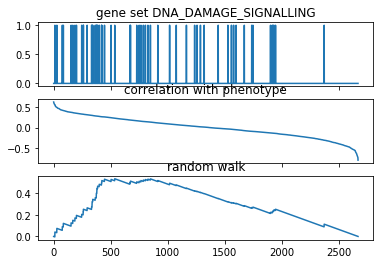

In [29]:
name = 'DNA_DAMAGE_SIGNALLING'
L,r = rank_genes(D,C)
plot_es_calculations(name, L, r)

In [30]:
n = 1000
S =  gene_set_hash[name]['indexes']
L, r = rank_genes(D,C)
ES = enrichment_score(L,r,S)
ES_pi = np.zeros(n)
for i in range(n):
    pi = np.array([np.random.randint(0,2) for i in range(k)])
    L, r = rank_genes(D,pi)
    ES_pi[i] = enrichment_score(L,r,S)

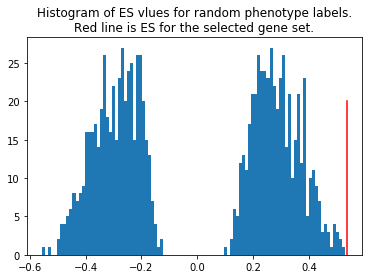

In [31]:
hist(ES_pi,bins=100)
plot([ES,ES],[0,20],'r-',label="ES(S)")
title("Histogram of ES vlues for random phenotype labels.\nRed line is ES for the selected gene set.")


ES = 0.268404322933


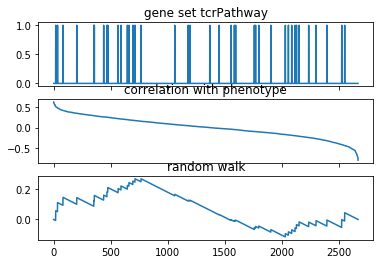

In [32]:
name = 'tcrPathway'
L,r = rank_genes(D,C)
plot_es_calculations(name, L, r)

In [33]:
n = 1000
S =  gene_set_hash[name]['indexes']
L, r = rank_genes(D,C)
ES = enrichment_score(L,r,S)
ES_pi = np.zeros(n)
for i in range(n):
    pi = np.array([np.random.randint(0,2) for i in range(k)])
    L, r = rank_genes(D,pi)
    ES_pi[i] = enrichment_score(L,r,S)

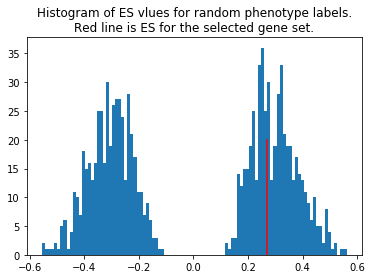

In [34]:
hist(ES_pi,bins=100)
plot([ES,ES],[0,20],'r-',label="ES(S)")
title("Histogram of ES vlues for random phenotype labels.\nRed line is ES for the selected gene set.")


## Performance optimizations

In [24]:
%timeit L,R = rank_genes(D,C)

3.56 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%timeit ES = enrichment_score(L,r,S)

926 µs ± 18.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [26]:
%prun order, NES, p_values = gsea(D, C, gene_sets)